In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_primes():
    """ Generate an infinite sequence of prime numbers """
    D = {} # Memory-efficient sieve of eratosthenes
    q = 2  # Running integer to check for prime-ness

    while True:
        if q not in D: # Prime. Mark first multiple as composite
            yield q
            D[q * q] = [q]
        else: # Composite. Mark multiples of its witnesses and delete
            for prime in D[q]:
                D.setdefault(prime + q, []).append(prime)
            del D[q]
        q += 1

In [3]:
def rot(n, x, y, rx, ry):
    """ Rotate/Flip a quadrant as necessary """
    if ry != 0: return x, y
    
    if rx == 1:
        x = n - 1 - x
        y = n - 1 - y
    
    return y, x
    
def d2xy(n, d):
    """ Convert d to (x, y) """
    s = 1
    x = y = 0
    while s < n:
        rx = 1 & (d//2)
        ry = 1 & (d^rx)
        x, y = rot(s, x, y, rx, ry)
        x, y = x+s*rx, y+s*ry
        
        d //= 4
        s *= 2
        
    return x, y

def generate_d2xy(n):
    """ Generate (x,y) points for iteration n"""
    space_size = 2**n
    num_points = space_size ** 2
    for num in range(num_points):
        yield d2xy(space_size, num)
        
def generate_prime_d2xy(n):
    """ Generate (x,y) points for primes at iteration n"""
    space_size = 2**n
    num_points = space_size ** 2
    
    for prime in gen_primes():
        if prime > num_points: break
        yield d2xy(space_size, prime)

In [4]:
def visualize(ax, n, primes_only=True, lines=False):
    xys = generate_prime_d2xy(n) if primes_only else generate_d2xy(n)
    ax.plot(*zip(*xys), '.', zorder=2)
    
    if lines:
        ax.plot(*zip(*generate_d2xy(n)), '-', zorder=1)

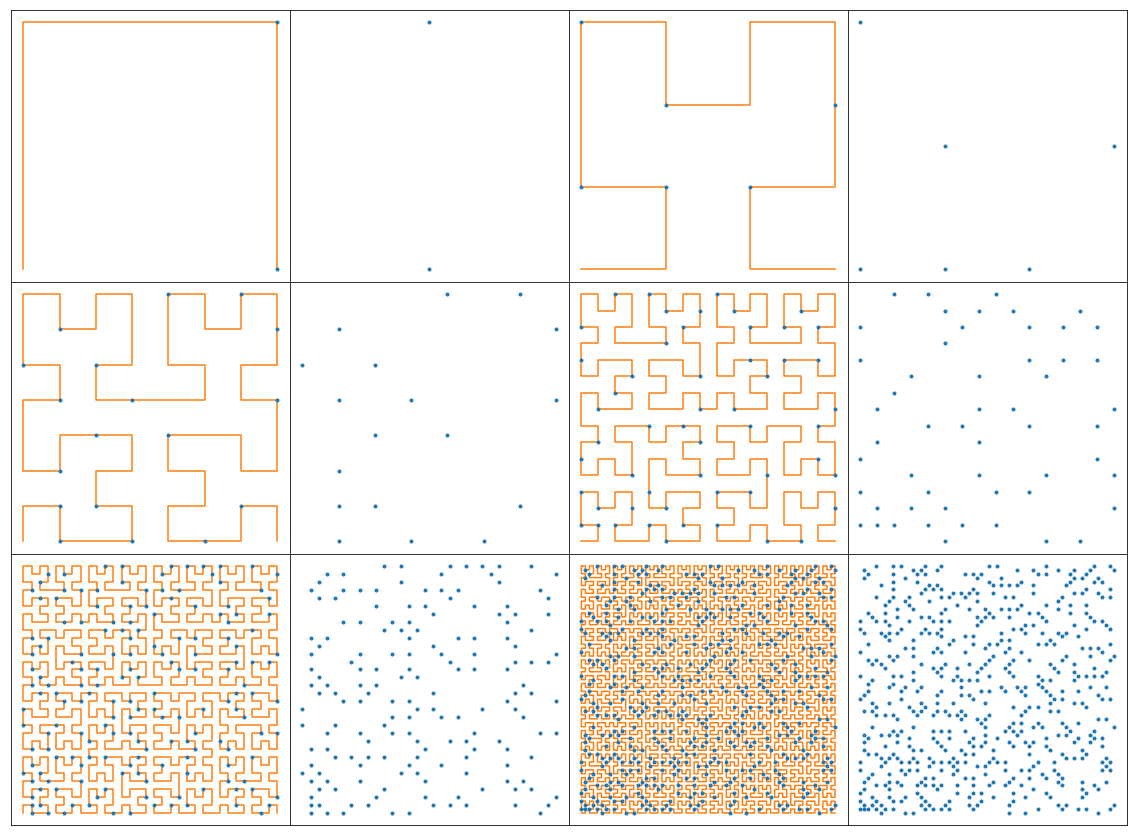

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw={'wspace':0, 'hspace':0})
axs_list = [ax for ax_l in axs for ax in ax_l]

for i in range(6):
    visualize(axs_list[2*i], i+1, primes_only=True, lines=True)
    visualize(axs_list[2*i+1], i+1)
plt.show()

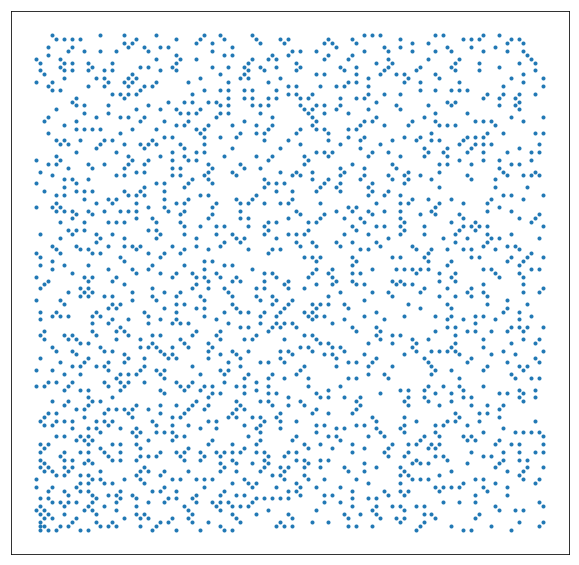

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]})
visualize(ax, 7)

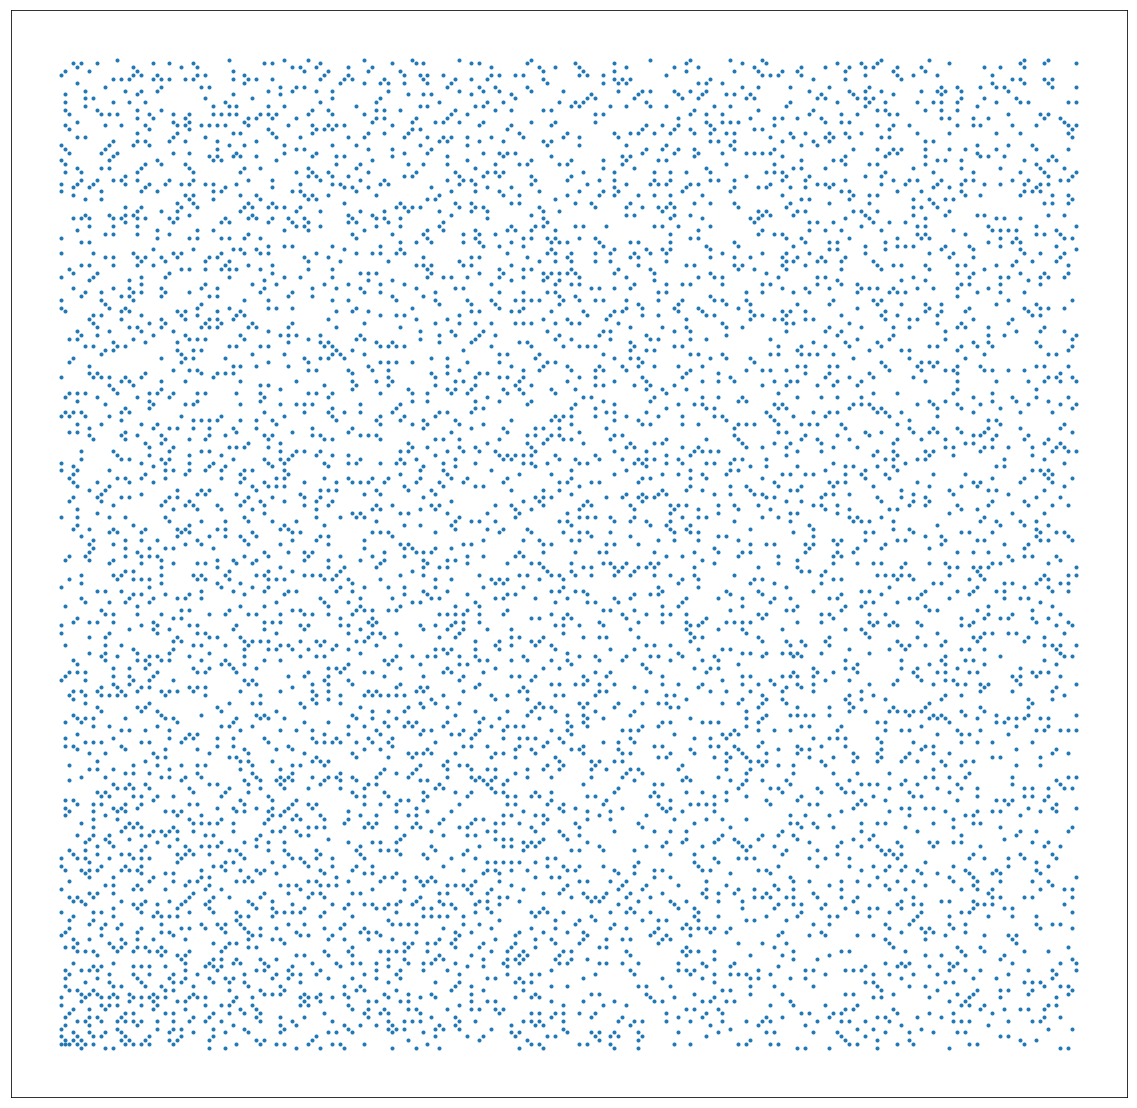

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})
visualize(ax, 8)

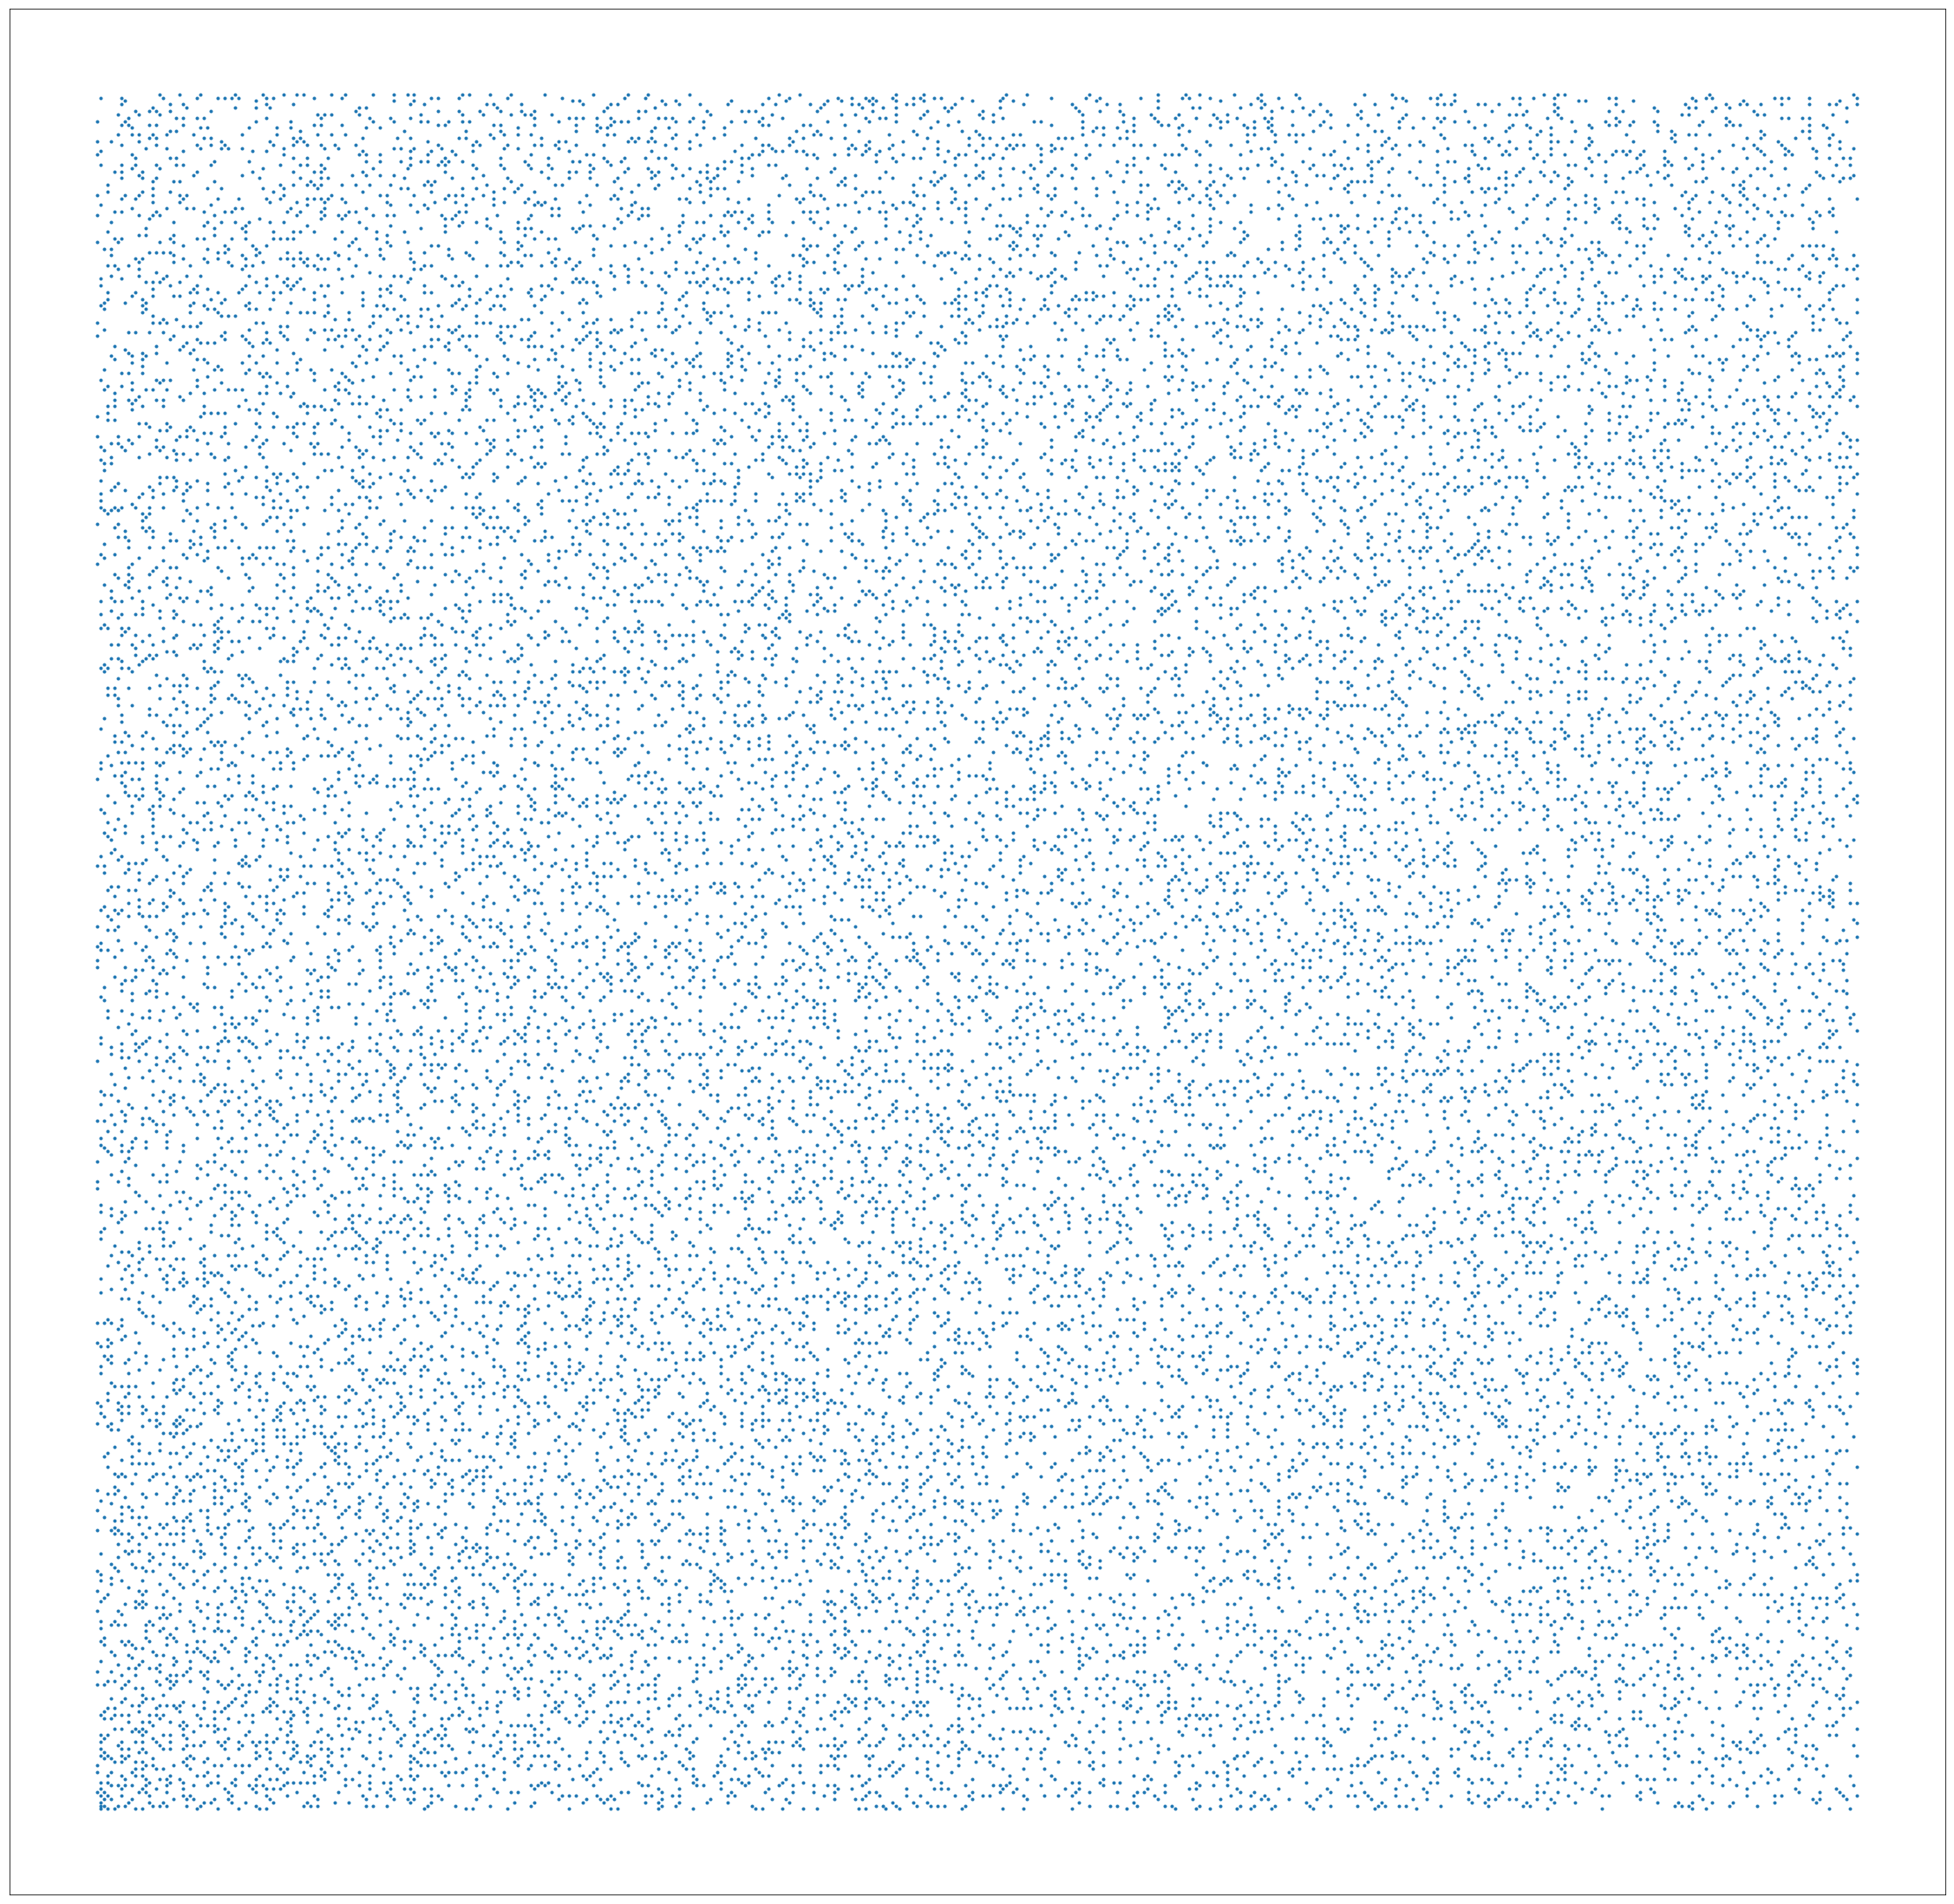

In [8]:
fig, ax = plt.subplots(1, figsize=(40,40), subplot_kw={'xticks':[], 'yticks':[]})
visualize(ax, 9)

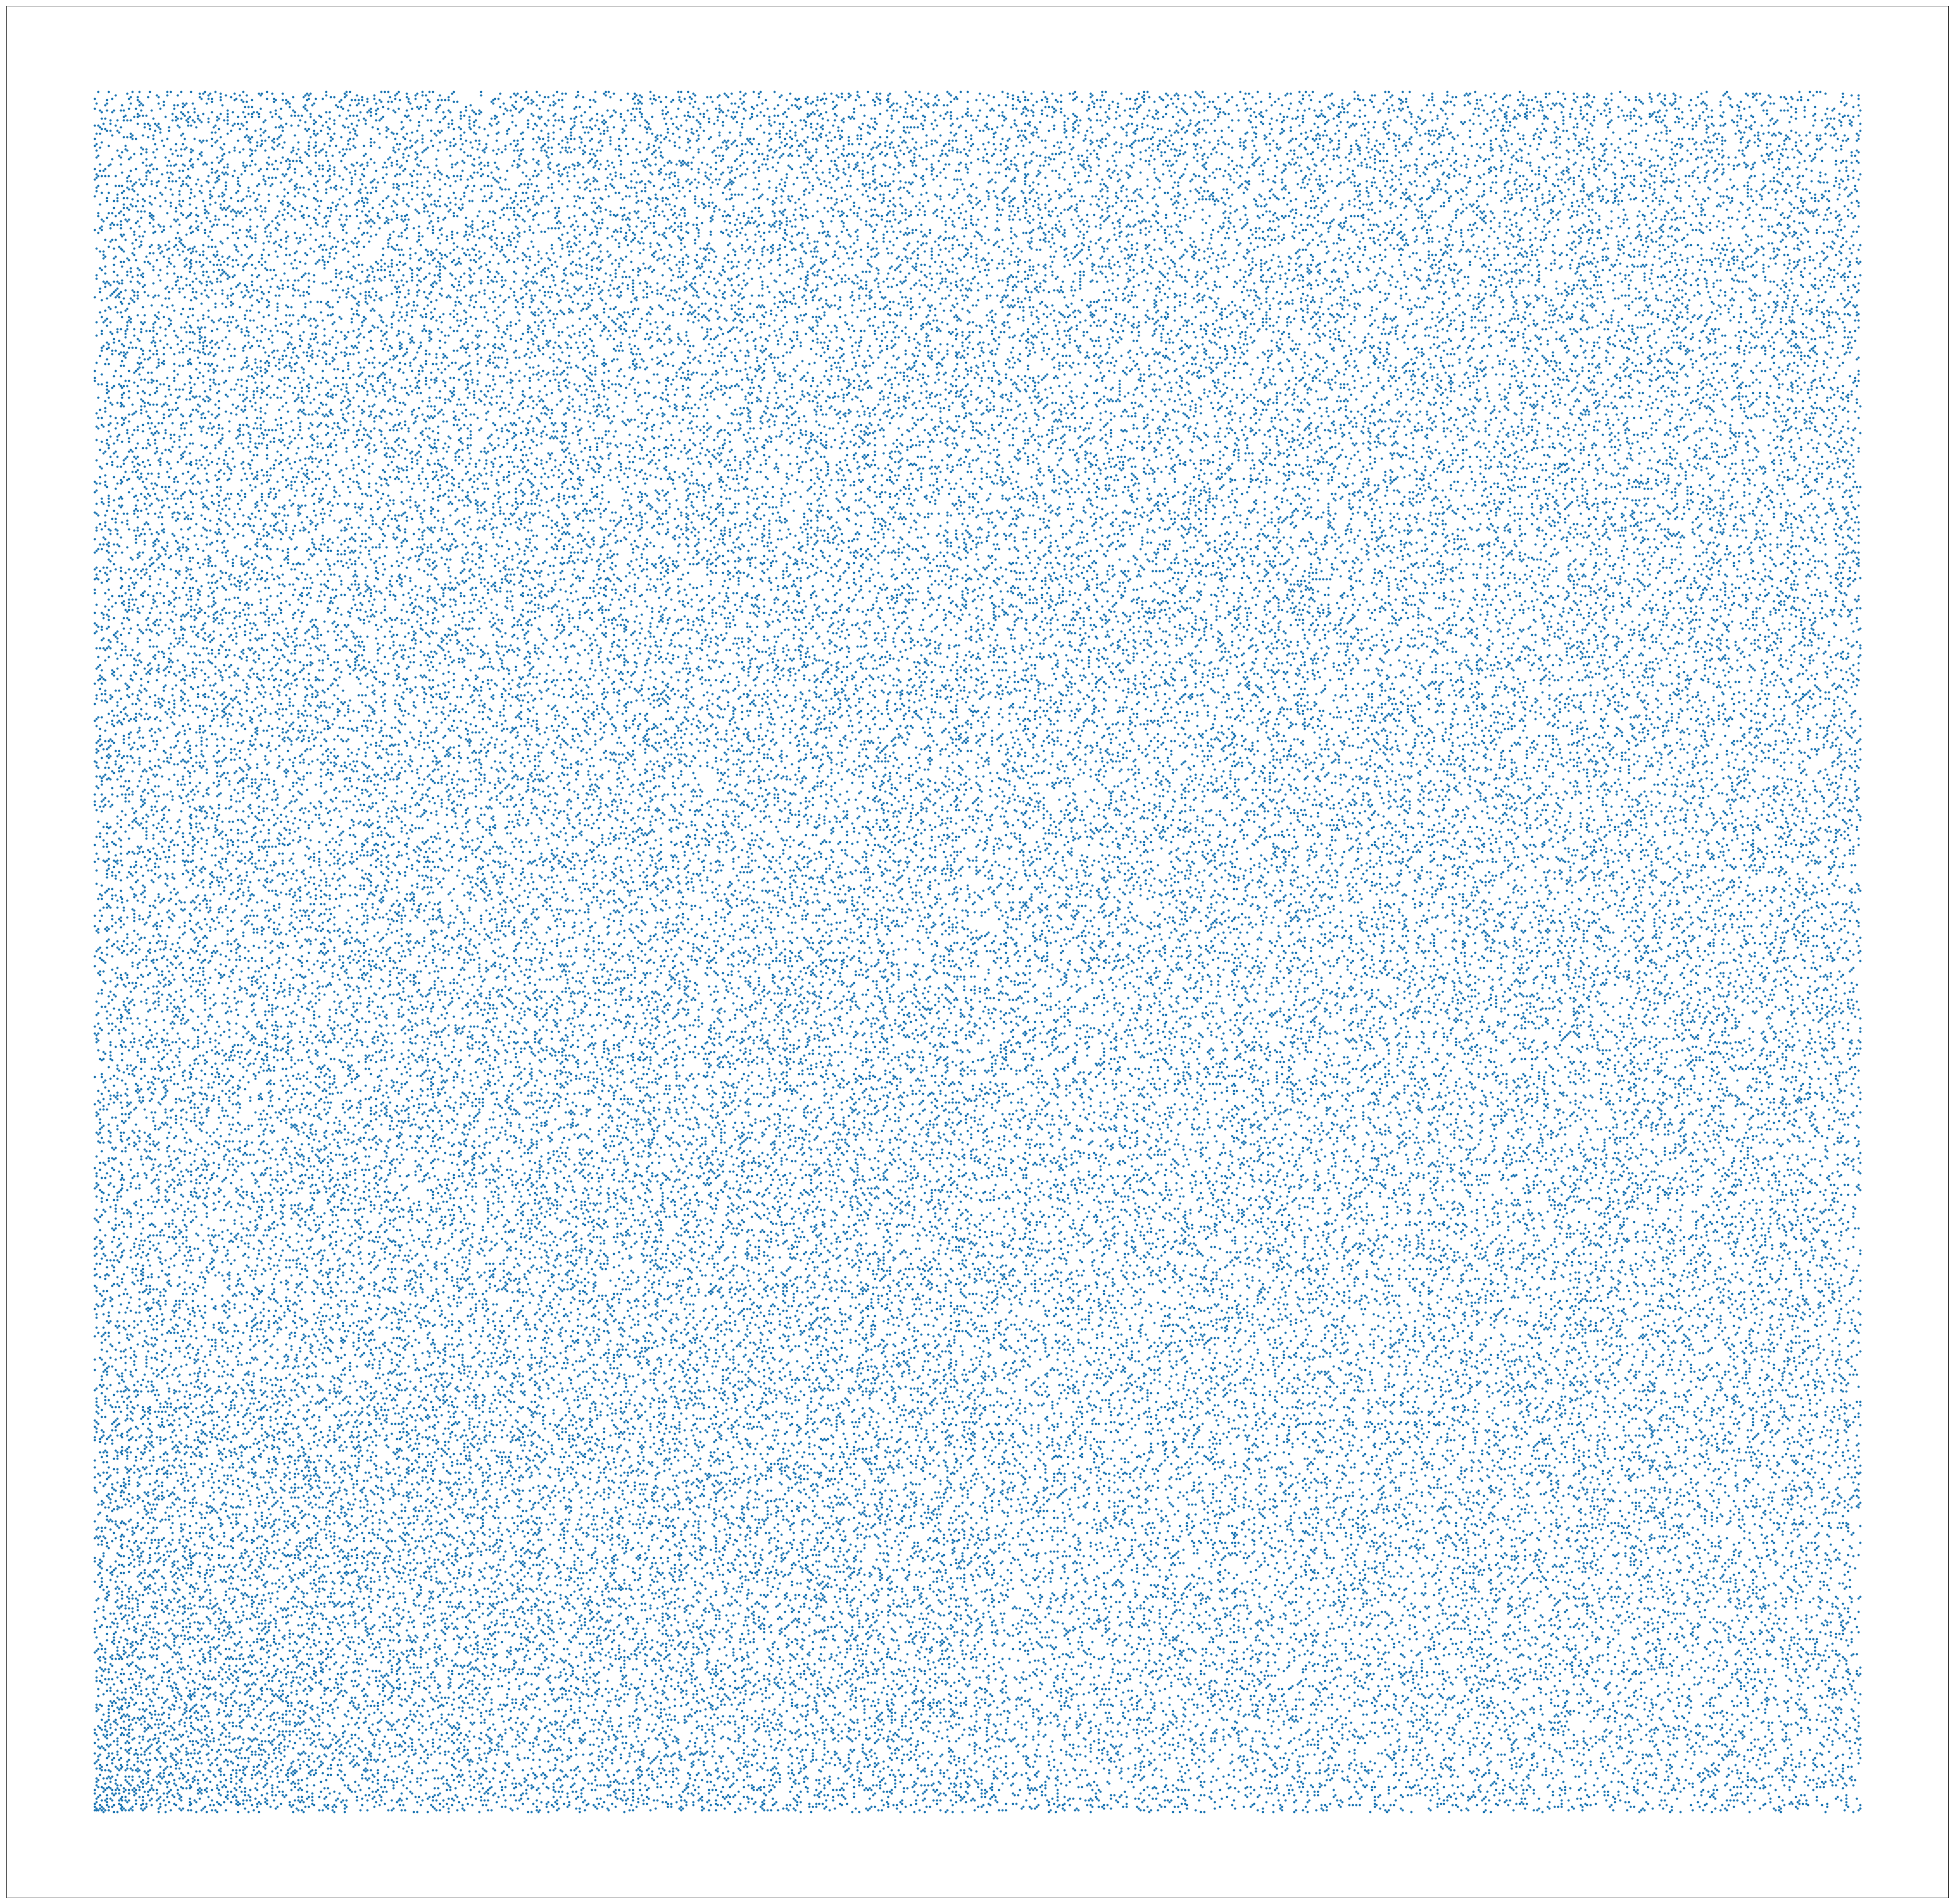

In [9]:
fig, ax = plt.subplots(1, figsize=(60, 60), subplot_kw={'xticks':[], 'yticks':[]})
visualize(ax, 10)

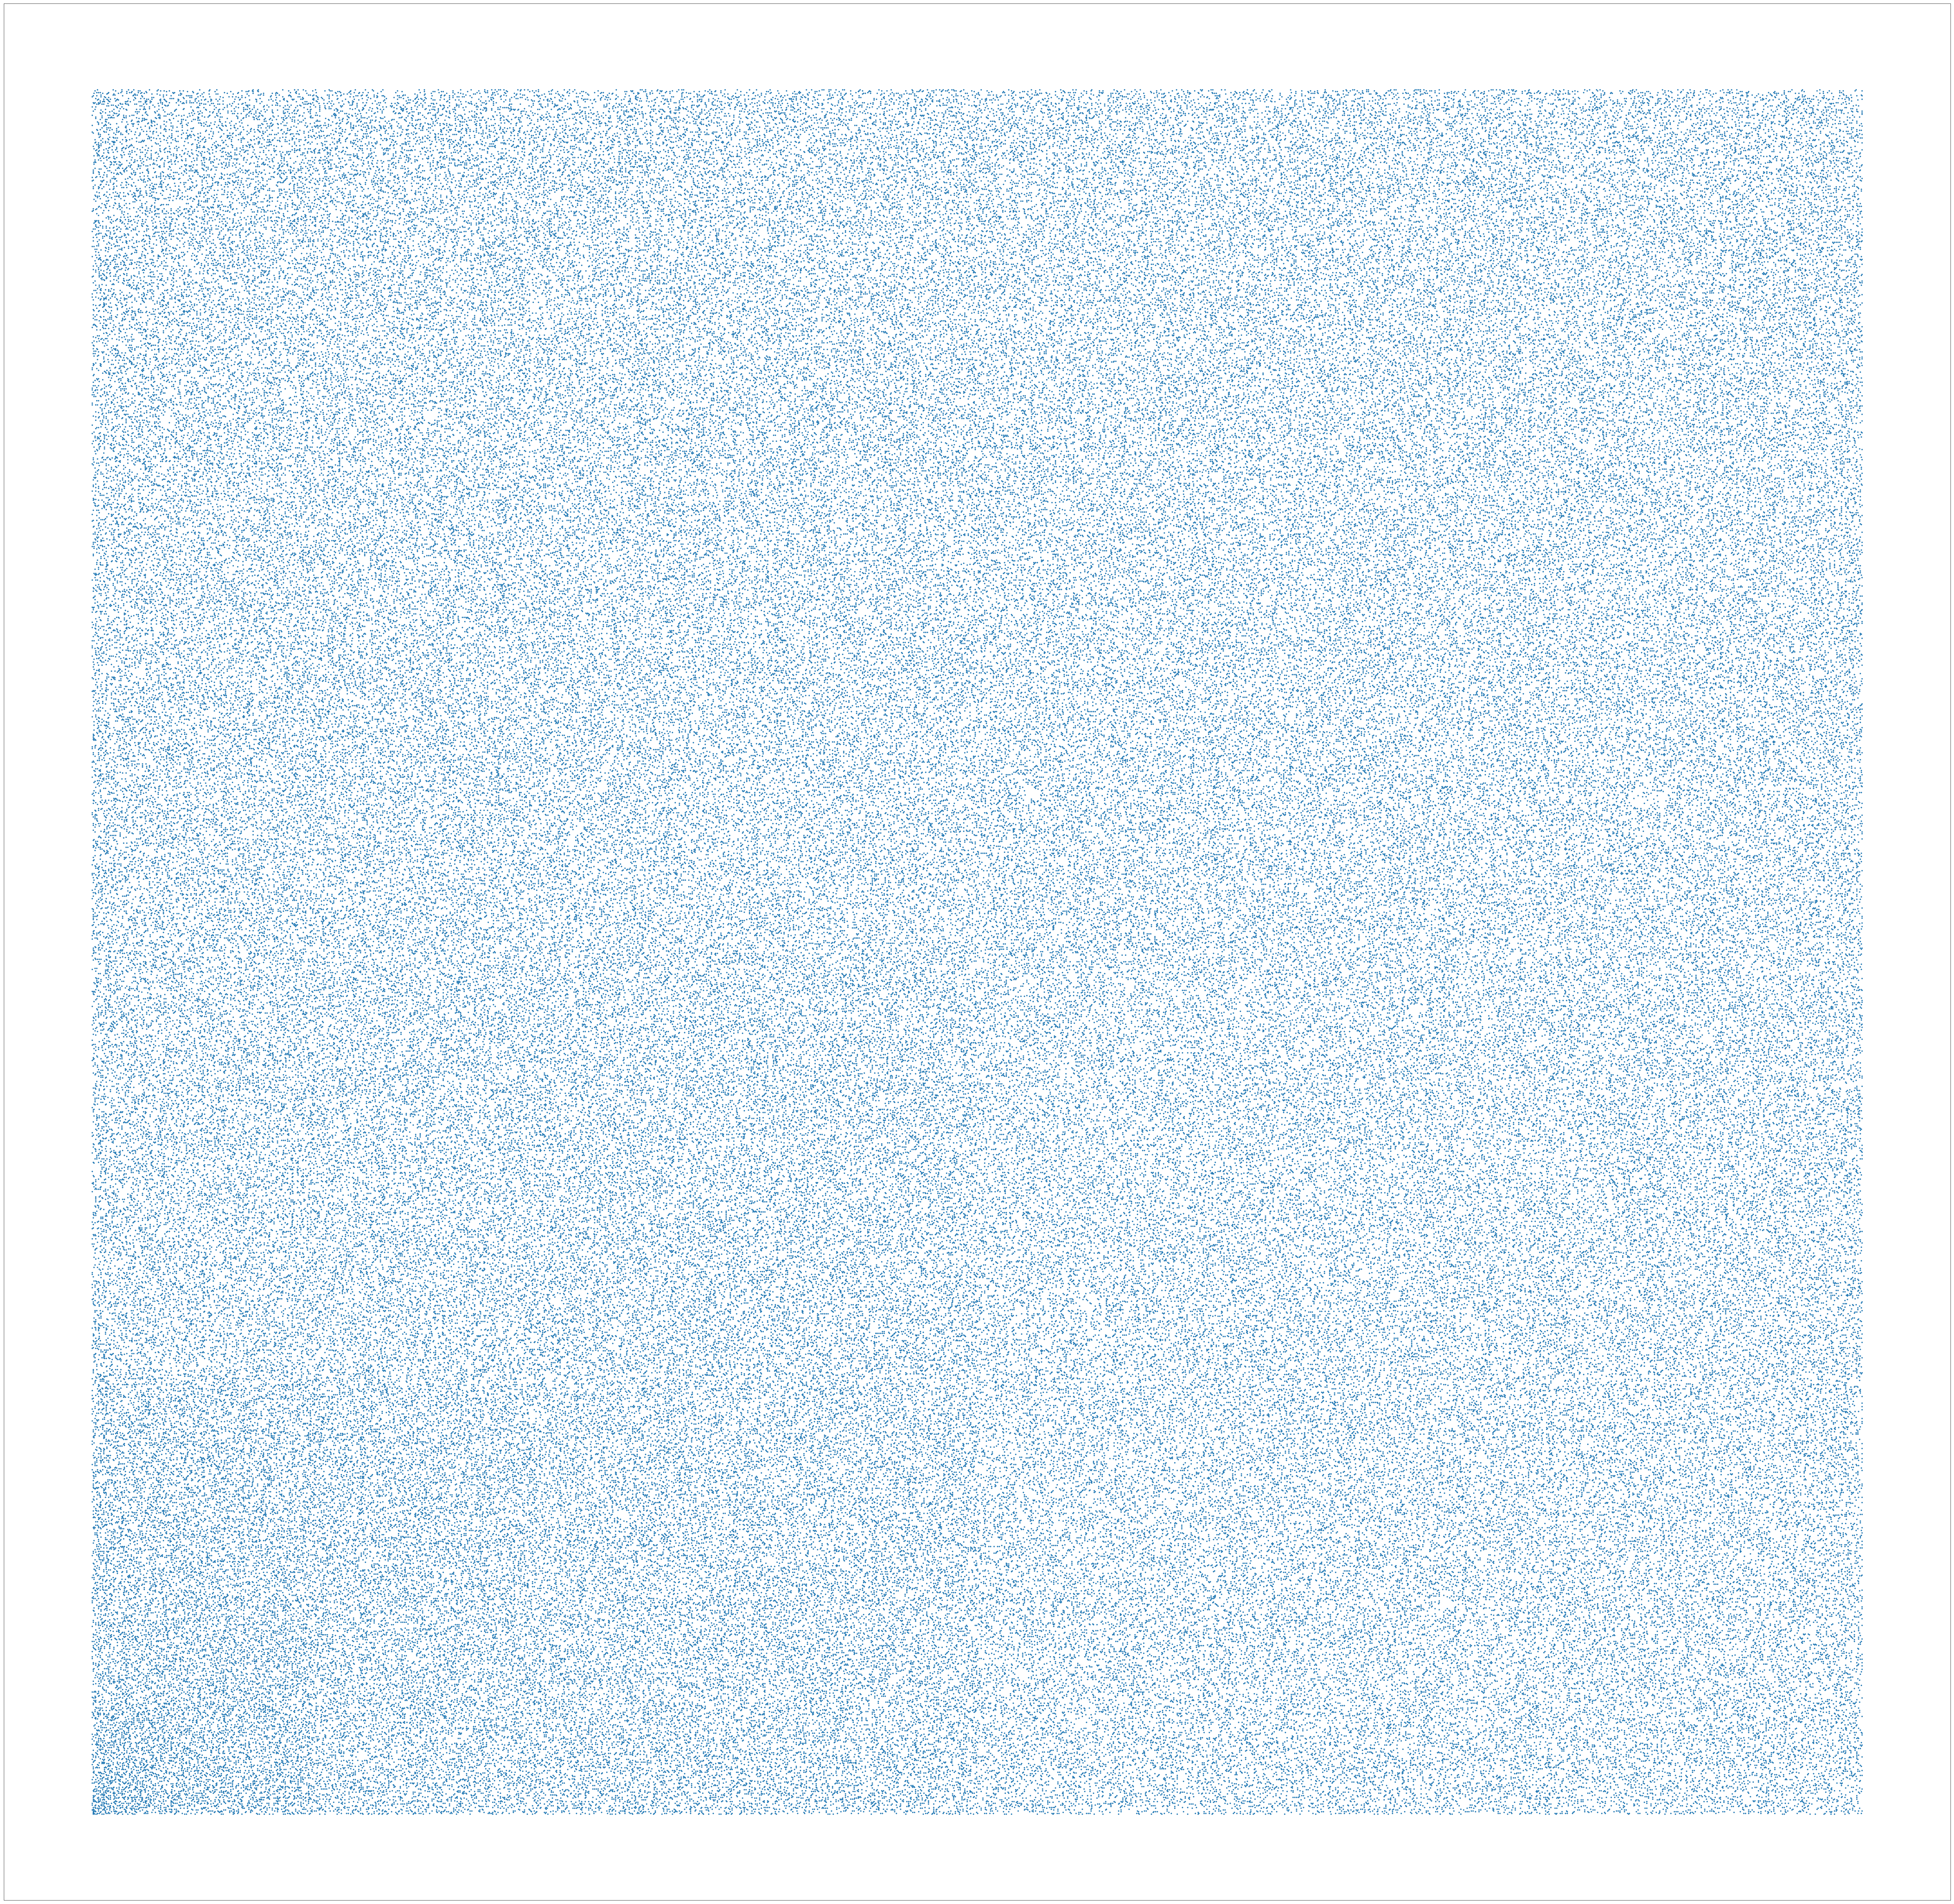

In [10]:
fig, ax = plt.subplots(1, figsize=(100, 100), subplot_kw={'xticks':[], 'yticks':[]})
visualize(ax, 11)